## Import Required Libraries

This section imports all libraries used throughout the notebook to support
data loading, preprocessing, model development, and evaluation.

- **pandas**: used for reading the dataset and handling tabular data.
- **train_test_split**: used to split the dataset into training and testing sets for unbiased evaluation.
- **TfidfVectorizer**: converts raw text into TF-IDF feature vectors suitable for machine learning models.
- **SMOTE**: handles class imbalance by generating synthetic samples for minority classes in the training data.
- **MultinomialNB**: the Naive Bayes classifier applied for sentiment classification.
- **accuracy_score, classification_report, confusion_matrix**: evaluation metrics to assess model performance.
- **matplotlib & seaborn**: visualization tools to present results (e.g., confusion matrix heatmap).


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Load Dataset

In this step, the dataset containing Reddit posts related to artists
and their corresponding sentiment labels is loaded from a local CSV file.
A relative file path is used to ensure that the analysis remains portable
and can be easily reproduced on different environments.

In [9]:
df = pd.read_csv("dataset/reddit_artist_posts_sentiment.csv")
df.head()

,text,label
0,pitchfork track review: taylor swift’s “actual...,negative
1,taylor swift has regained the masters of her f...,positive
2,pitchfork review: taylor swift - the life of a...,neutral
3,taylor swift announced engagement,neutral
4,taylor swift - the fate of ophelia (official m...,neutral


## Sentiment Label Encoding

In this step, sentiment labels are converted from categorical text values
into numerical representations. This transformation is required because
machine learning algorithms operate on numerical data rather than textual labels.

The sentiment categories are encoded as follows:
- Positive → 1
- Neutral → 0
- Negative → -1

In [10]:
df = df.replace({'positive':1, 'neutral':0, 'negative':-1})
df.head()

C:\Users\RAHMAT\AppData\Local\Temp\ipykernel_31024\762659608.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'positive':1, 'neutral':0, 'negative':-1})


,text,label
0,pitchfork track review: taylor swift’s “actual...,-1
1,taylor swift has regained the masters of her f...,1
2,pitchfork review: taylor swift - the life of a...,0
3,taylor swift announced engagement,0
4,taylor swift - the fate of ophelia (official m...,0


In [11]:
df['label'].value_counts()

label
 0    19728
 1     8825
-1     3395
Name: count, dtype: int64

## Train–Test Split

In this step, the dataset is divided into training and testing subsets.
The training set is used to build the sentiment classification model,
while the testing set is reserved for evaluating the model’s performance
on unseen data.

An 80:20 split ratio is applied, where 80% of the data is used for training
and 20% is used for testing. A fixed random state is specified to ensure
that the data split is reproducible.

In [18]:
x = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
print("Training label distribution:\n", y_train.value_counts())
print("Testing label distribution:\n", y_test.value_counts())

Training label distribution:
 label
 0    15798
 1     7017
-1     2743
Name: count, dtype: int64
Testing label distribution:
 label
 0    3930
 1    1808
-1     652
Name: count, dtype: int64


## Feature Extraction using TF-IDF

This step transforms raw textual data into numerical feature vectors
using the Term Frequency–Inverse Document Frequency (TF-IDF) technique.
TF-IDF assigns higher weights to words that are important within a document
while reducing the influence of terms that appear frequently across the corpus.

The vectorizer is fitted only on the training data to prevent information
leakage, and the learned vocabulary is then applied to the testing data
using the same feature space.

In [22]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Handling Class Imbalance using SMOTE

This step addresses the issue of class imbalance in the training dataset
by applying the Synthetic Minority Over-sampling Technique (SMOTE).
SMOTE generates synthetic samples for minority classes, enabling the model
to learn from a more balanced distribution of sentiment labels.

Oversampling is applied **only to the training data** to avoid data leakage
and to ensure that model evaluation on the testing data remains fair
and unbiased.

In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

## Model Training using Naive Bayes

In this step, a Multinomial Naive Bayes classifier is trained using the
TF-IDF feature representation of the text data. Naive Bayes is well suited
for text classification tasks due to its probabilistic framework and its
ability to efficiently handle high-dimensional sparse feature spaces.

The model is trained on the resampled training data obtained after applying
SMOTE, allowing it to learn from a balanced distribution of sentiment classes.

In [28]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_resampled, y_train_resampled)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


## Model Evaluation and Visualization

This step evaluates the performance of the trained Naive Bayes classifier
on the testing dataset. Several evaluation metrics are employed to provide
a comprehensive assessment of the model’s predictive capability.

The evaluation includes:
- **Accuracy**: to measure overall classification performance.
- **Classification Report**: to examine precision, recall, and F1-score
  for each sentiment class.
- **Confusion Matrix**: to analyze correct and incorrect predictions
  across sentiment categories.

In addition, the confusion matrix is visualized as a heatmap to offer
a clearer and more intuitive interpretation of the model’s classification
results.

Accuracy: 0.6776

Classification Report:
              precision    recall  f1-score   support

          -1       0.40      0.81      0.54       652
           0       0.87      0.63      0.73      3930
           1       0.59      0.72      0.65      1808

    accuracy                           0.68      6390
   macro avg       0.62      0.72      0.64      6390
weighted avg       0.74      0.68      0.69      6390

Confusion Matrix:
[[ 531   60   61]
 [ 598 2492  840]
 [ 188  313 1307]]


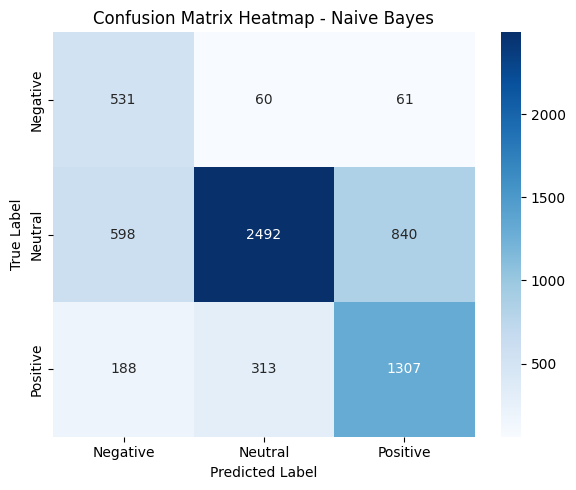

In [33]:
y_pred = naive_bayes_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Neutral", "Positive"],
    yticklabels=["Negative", "Neutral", "Positive"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Naive Bayes")
plt.tight_layout()
plt.show()